In [40]:
# Necessary libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import  StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

import joblib

In [33]:
df = pd.read_csv("../data/heart_disease.csv")
df.head()


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,0.936181,1.0,0.750380,-0.276443,1.0,0.017494,0.0,1.068965,0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.378929,1.0,1.596266,0.744555,0.0,-1.816334,1.0,0.381773,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.378929,1.0,-0.659431,-0.353500,0.0,-0.899420,1.0,1.326662,1,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-1.941680,1.0,-0.095506,0.051047,0.0,1.633010,0.0,2.099753,0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.498933,0.0,-0.095506,-0.835103,0.0,0.978071,0.0,0.295874,0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [34]:
X = df.drop(columns=['target'])
y = df['target']

In [35]:
pca = PCA(n_components=None)  
X_pca = pca.fit_transform(X)

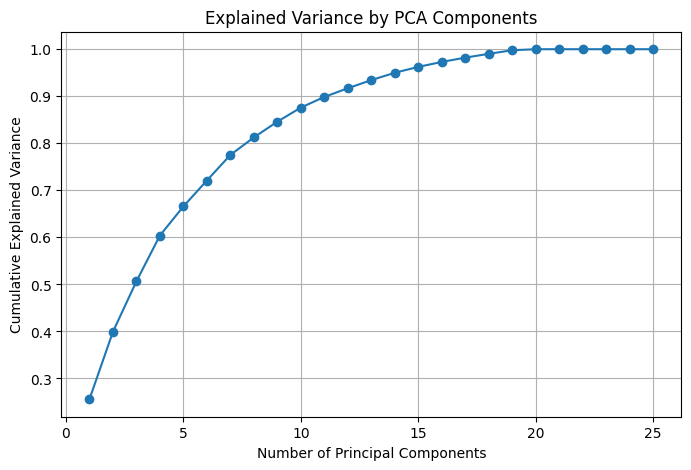

In [36]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Cumulative variance
cumulative_variance = np.cumsum(explained_variance)

# Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()



In [37]:
pca_final = PCA(n_components=20) 
X_pca = pca_final.fit_transform(X)

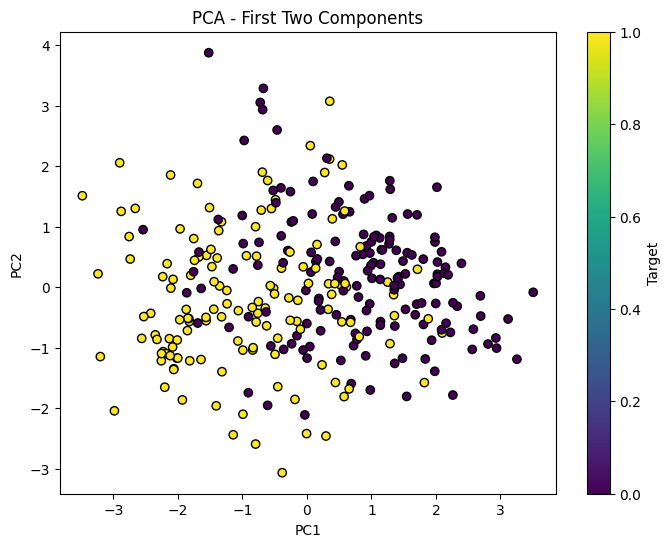

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - First Two Components")
plt.colorbar(label="Target")
plt.show()


In [39]:
# Save the PCA transformed data
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
pca_df['target'] = y.values 

pca_df.to_csv("../data/heart_disease.csv", index=False)
print("PCA transformed data saved to ../data/heart_disease.csv Successfully.")

PCA transformed data saved to ../data/heart_disease.csv Successfully.
